In [1]:
import torch
from word2vec_models import CBOW
import pickle

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
#Load cleaned words and dictionary
with open('../data/cleaned_words.pickle', 'rb') as handle:
    corpus = pickle.load(handle)
with open('../data/word_to_ix.pickle', 'rb') as handle:
    word_to_ix = pickle.load(handle)
with open('../data/ix_to_word.pickle', 'rb') as handle:
    ix_to_word = pickle.load(handle)
vocab_size = len(word_to_ix)

In [4]:
########################################################################
# Import best performing model
model_path = '../models/cbow_d200_cs_2_5.pth'

checkpoint = torch.load(f=model_path, map_location=torch.device('cpu'))

In [6]:
net = CBOW(vocab_size, 200, 4)

In [7]:
net.load_state_dict(checkpoint['model_state_dict'])
net.eval()

CBOW(
  (embeddings): Embedding(253702, 200)
  (fc1): Linear(in_features=800, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=253702, bias=True)
)

In [8]:
net.ix_to_embeddding(torch.tensor([word_to_ix['abuse']],dtype=torch.long))

tensor([[ 1.1011e+00,  4.2328e-01, -4.4972e-01,  9.7611e-01, -9.8127e-01,
         -3.4704e-01, -3.8158e-03,  2.6496e-01,  5.6655e-01, -2.5425e-01,
          1.1316e+00,  1.3075e+00, -1.5433e-01, -1.1384e+00,  2.2486e-01,
         -6.3027e-03, -1.8889e-01,  2.7989e-01, -9.5245e-01, -1.7248e+00,
         -3.5791e-01,  2.5214e-01, -3.4424e-01,  1.0806e+00, -5.1377e-04,
          5.8593e-02, -1.0250e-01, -6.7181e-01,  7.7764e-01,  1.1046e+00,
          1.3032e+00, -3.0751e-01,  2.5681e-01, -9.8070e-01, -2.6220e-01,
         -8.2471e-01, -1.2529e+00,  6.4368e-01,  7.8662e-01, -2.2691e+00,
          4.8823e-01,  8.0378e-01,  1.5918e+00,  5.5825e-01, -5.6243e-02,
         -1.0587e+00,  1.5757e+00,  6.6275e-01,  1.2936e-01,  1.0348e+00,
          4.5855e-01,  5.7907e-01,  2.3066e+00, -9.0240e-01,  6.9605e-01,
         -6.7913e-01,  1.4366e-01,  5.8828e-01, -6.5309e-01,  3.2162e-01,
          1.3707e+00, -2.0575e+00, -1.6196e+00,  9.5747e-01,  1.2240e+00,
         -4.0888e-01,  4.8640e-01, -2.

In [9]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [10]:
# getting embeddings from the embedding layer of our model, by name
embeddings = net.embeddings.weight.to('cpu').data.numpy()

In [11]:
viz_words = 500
tsne = TSNE()
embed_tsne = tsne.fit_transform(embeddings[:viz_words, :])

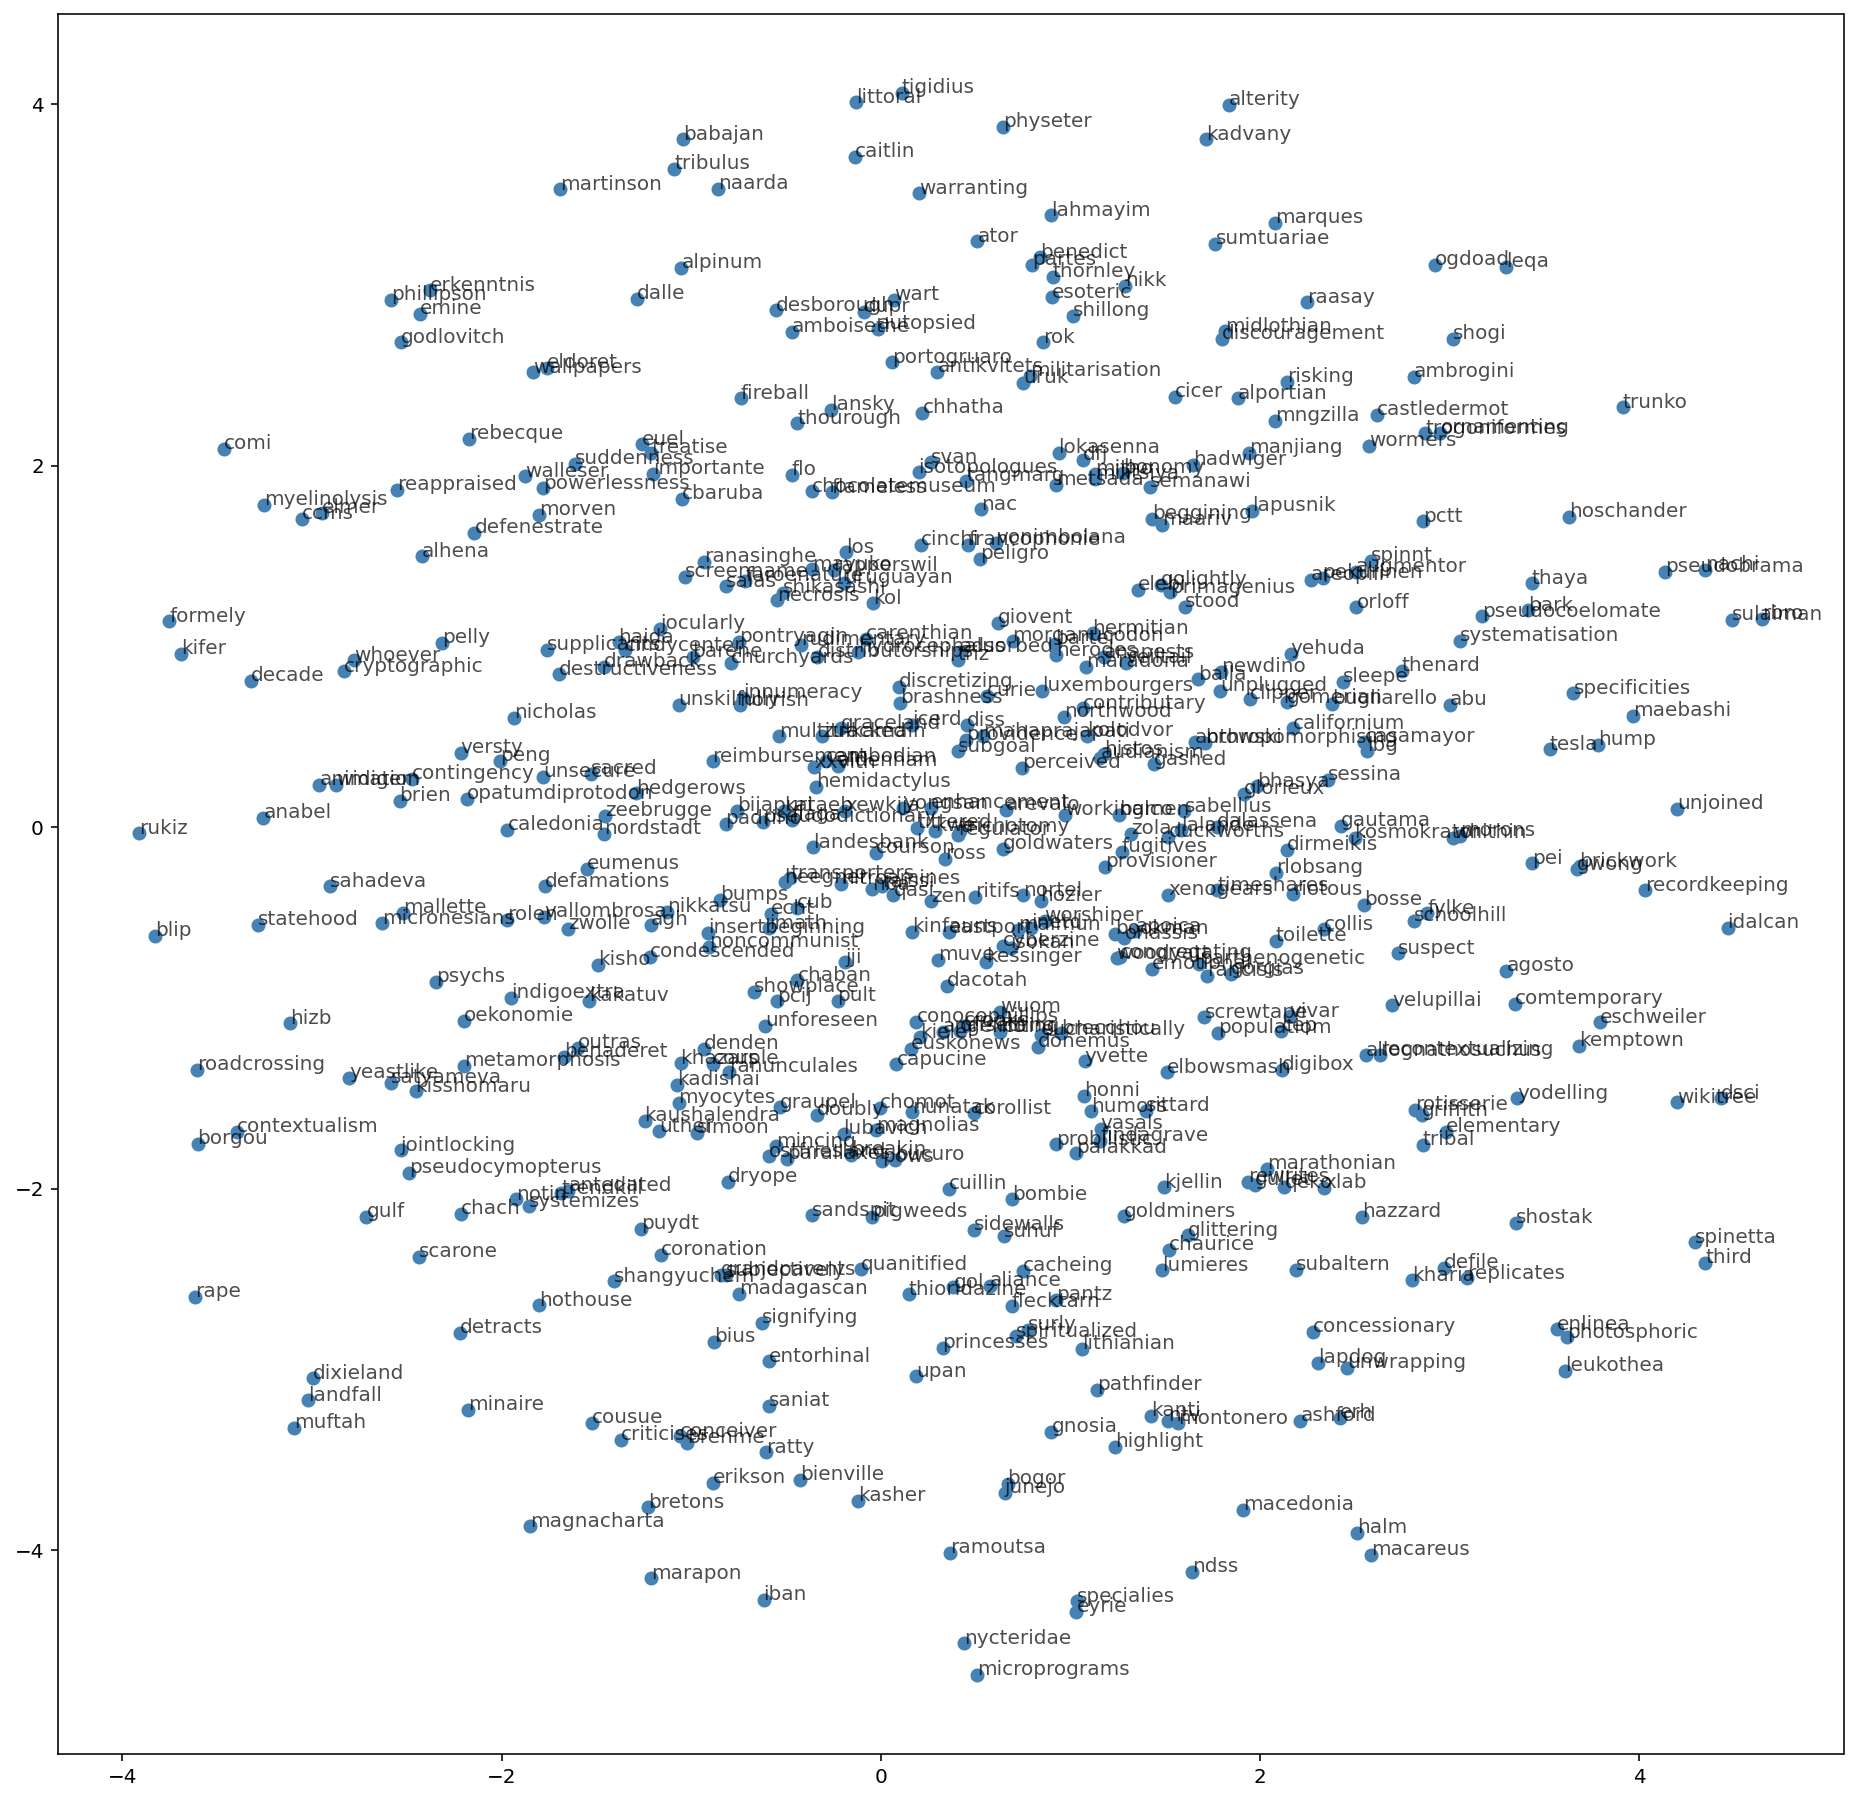

In [12]:
fig, ax = plt.subplots(figsize=(16, 16))
for idx in range(viz_words):
    plt.scatter(*embed_tsne[idx, :], color='steelblue')
    plt.annotate(ix_to_word[idx], (embed_tsne[idx, 0], embed_tsne[idx, 1]), alpha=0.7)